In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HousingData.csv')
df.fillna(df.mean(), inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


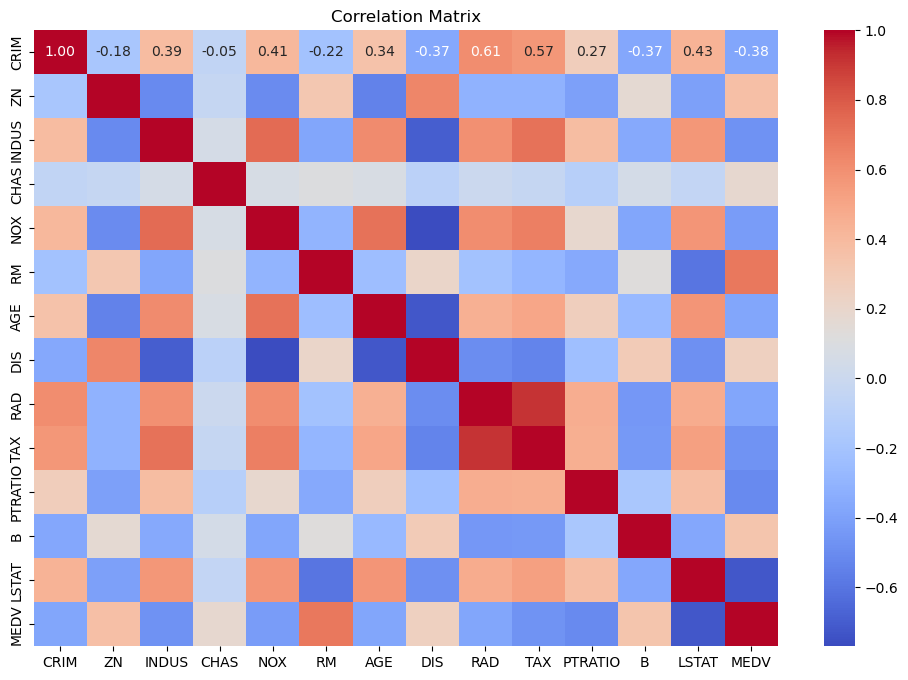

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

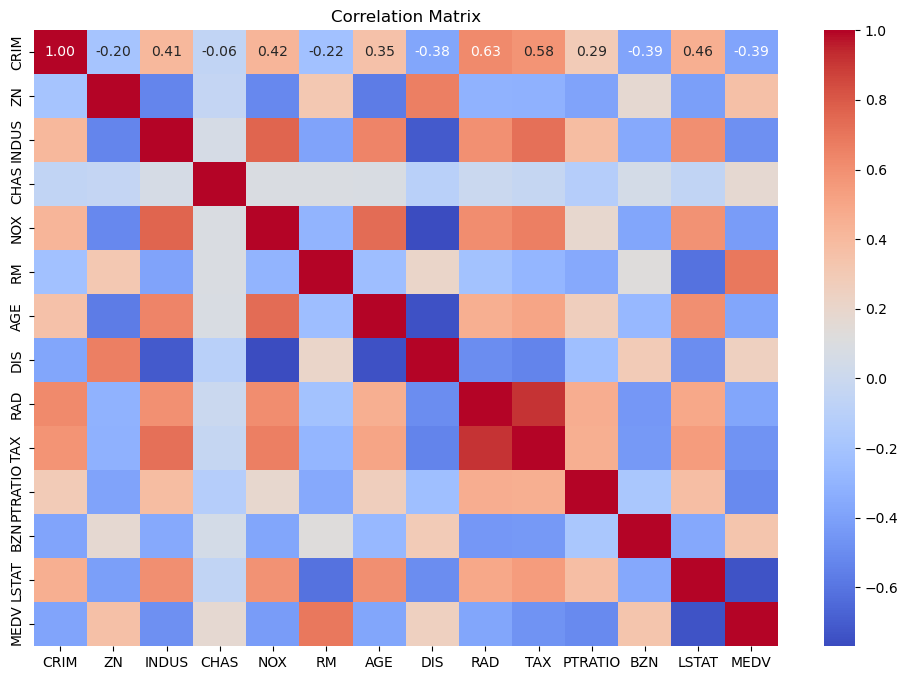

In [23]:
# Load the Boston dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

# Define the column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "BZN", "LSTAT"
]

# Combine train and test data for full DataFrame
X_full = np.vstack([x_train, x_test])
y_full = np.concatenate([y_train, y_test])

# Create DataFrame
df = pd.DataFrame(X_full, columns=columns)
df["MEDV"] = y_full

# Check missing (no missing in this dataset, but keeping it similar)
df.fillna(df.mean(), inplace=True)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
X = df[["RM", "LSTAT", "PTRATIO"]]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R2: {r2_score(y_test, y_pred_lr):.2f}")

MAE: 3.26
MSE: 19.46
R2: 0.74


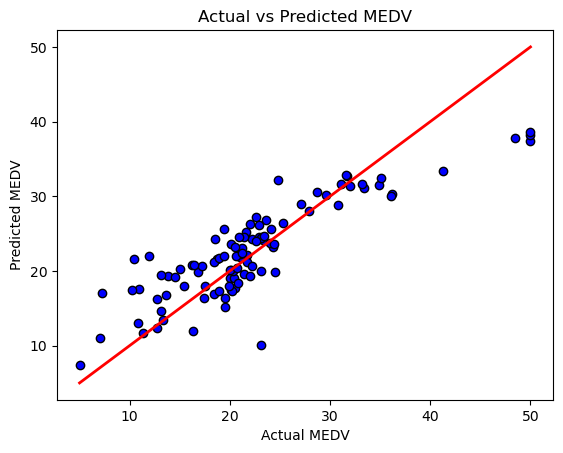

In [4]:
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()

In [10]:
comp_df = pd.DataFrame({'Original_MEDV': y_test.values, 'Predicted_MEDV': y_pred_lr})
print(comp_df.head())

   Original_MEDV  Predicted_MEDV
0           41.3       33.351222
1           24.3       23.250404
2           22.2       24.237084
3           10.8       12.960164
4           33.4       31.160876


In [5]:
X_full = df.drop(columns='MEDV')
y_full = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Scale inputs only
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)  # Fit + Transform on training data
x_test_scaled = scaler_x.transform(x_test)       # Only Transform on test data

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6901 (26.96 KB)
Trainable params: 6701 (26.18 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [6]:
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(x_test_scaled, y_test))

Epoch 1/20


13/13 [==============================] - 1s 15ms/step - loss: 558.2744 - mae: 21.5351 - val_loss: 534.5551 - val_mae: 21.4193
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 470.7072 - mae: 19.5670 - val_loss: 501.4304 - val_mae: 20.6786
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 379.8158 - mae: 17.2804 - val_loss: 452.6809 - val_mae: 19.5354
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 284.1286 - mae: 14.5471 - val_loss: 387.7006 - val_mae: 17.9095
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 196.0522 - mae: 11.4405 - val_loss: 311.4798 - val_mae: 15.8249
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 128.5206 - mae: 8.7490 - val_loss: 244.0336 - val_mae: 13.7334
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 84.1103 - mae: 7.0471 - val_loss: 198.7589 - val_mae: 12.1974
Epoch 8/20
13/13 [==============================

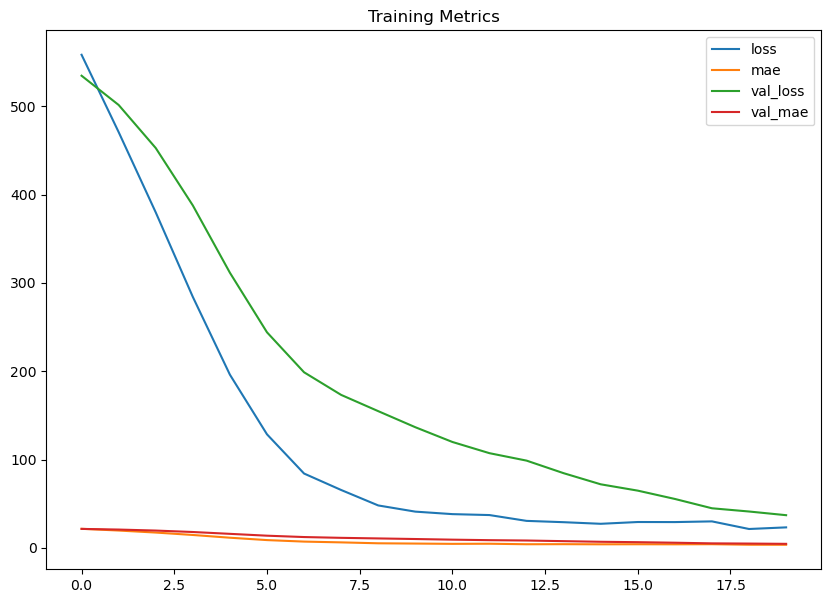

In [7]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Training Metrics")
plt.show()

4/4 [==============================] - 0s 2ms/step


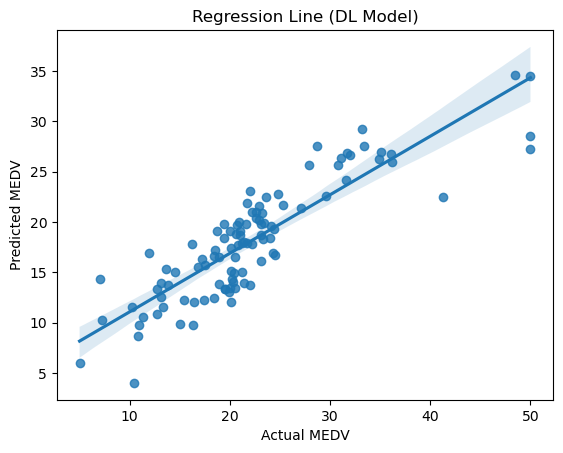

MAE: 4.51
MSE: 36.95
R2: 0.50


In [8]:
y_pred_dl = model.predict(x_test_scaled).flatten()

sns.regplot(x=y_test, y=y_pred_dl)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Regression Line (DL Model)")
plt.show()

print(f"MAE: {mean_absolute_error(y_test, y_pred_dl):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dl):.2f}")
print(f"R2: {r2_score(y_test, y_pred_dl):.2f}")

In [9]:
comp_df = pd.DataFrame({'Original_MEDV': y_test.values, 'Predicted_MEDV': y_pred_dl})
print(comp_df.head())

   Original_MEDV  Predicted_MEDV
0           41.3       22.527725
1           24.3       16.936132
2           22.2       21.035341
3           10.8        8.669295
4           33.4       27.563131
